In [ ]:
# this needs to be run for each new runtime
# because colab has scikit-learn 1.0.2 pre-installed 
# and we need newer version (1.2.0 and higher)
# to use .set_output() method
!pip install scikit-learn --upgrade

# if you plan on running the whole notebook again during the same runtime
# you can comment the line above

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 35.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


# Supervised Machine Learning: Regression

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
diamonds = sns.load_dataset('diamonds')

diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**What the columns of our DataFrame mean**
* price: price in US dollars (\$326–\$18,823)
* carat: weight of the diamond (0.2–5.01)
* cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* color: diamond colour, from D (best) to J (worst)
* clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* x: length in mm (0–10.74)
* y: width in mm (0–58.9)
* z: depth in mm (0–31.8)
* depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43–79)
* table: width of top of diamond relative to widest point (43–95)

## Split the data

In [ ]:
X = diamonds.copy()
y = X.pop('price')

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=8)

## Testing the Kbest - optional

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import FunctionTransformer
# from sklearn.pipeline import make_pipeline
# from sklearn.feature_selection import SelectKBest, f_regression

# KBest = SelectKBest(score_func=f_regression, k=10)
# tree = DecisionTreeRegressor()

# pipe = make_pipeline(
#     (preprocessor),
#     (KBest),
#     (tree)
# ).set_output(transform='pandas')
# pipe

In [ ]:
# param_grid = {
#     'selectkbest__k':range(1,7)
# }
# grid_search = GridSearchCV(
#     pipe,
#     param_grid = param_grid,
#     cv=5,
#     scoring='r2',
#     verbose =1

# )
# grid_search.fit(X_train,y_train)

In [ ]:
# grid_search.best_params_

In [ ]:
# grid_search.best_estimator_.named_steps.columntransformer.get_feature_names_out()

In [ ]:
# grid_search.best_estimator_.named_steps.selectkbest.get_feature_names_out()

In [ ]:
# r2_score(y_test,grid_search.predict(X_test.select_dtypes('number')))

## Dummy model

Normally the price of a diamond is linked to how many carats. So first, let's look at the price and the carats of a diamond to see if we can make a quick dumb model.

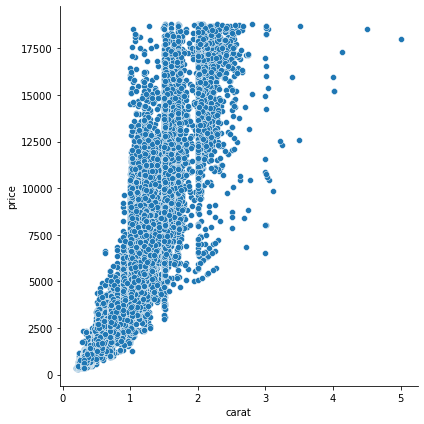

In [ ]:
sns.relplot(x = X_train['carat'], y = y_train, height = 6);

Based on the graph above I'm going to create a real simple model:

$$
price = carat*5000
$$

In [ ]:
dumb_model_df = X_train.copy()
dumb_model_df['price']= y_train
dumb_model_df["predicted_price"] = dumb_model_df["carat"] * 5000
dumb_model_df["price_difference"] = dumb_model_df["predicted_price"] - y_train

dumb_model_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,predicted_price,price_difference
34530,0.33,Ideal,G,VVS1,62.0,56.0,4.45,4.48,2.77,868,1650.0,782.0
26173,2.00,Very Good,I,VS2,59.5,62.0,8.13,8.21,4.86,15510,10000.0,-5510.0
20038,0.30,Good,H,SI1,63.4,58.0,4.21,4.24,2.68,421,1500.0,1079.0
41661,0.54,Ideal,J,VVS1,62.2,54.0,5.23,5.25,3.26,1239,2700.0,1461.0
42306,0.41,Premium,D,VVS2,62.5,58.0,4.72,4.75,2.96,1295,2050.0,755.0


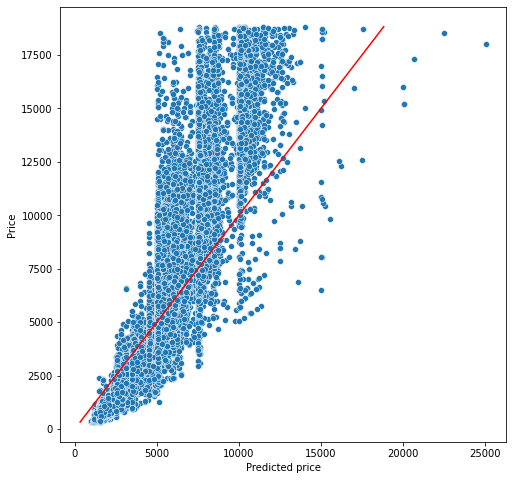

In [ ]:
def plot_predictions(y_true, y_pred): 
    max_preds = min([max(y_pred.tolist()), max(y_true.tolist())])
    min_preds = min([min(y_pred.tolist()), min(y_true.tolist())])
    # plot
    plt.figure(figsize=(8,8))
    sns.scatterplot(x=y_pred, y=y_true)
    sns.lineplot(x=[min_preds,max_preds], y=[min_preds, max_preds], color='red')
    plt.ylabel('Price')
    plt.xlabel('Predicted price')
    plt.show()

plot_predictions(y_train, dumb_model_df['predicted_price'])

### Results
[List of what metrics are available](https://scikit-learn.org/stable/modules/classes.html?highlight=metrics#module-sklearn.metrics)

[Explanation of all regression metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

#### Mean Absolute Error
It's the average difference between the actual values and the predicted value.

In [ ]:
from sklearn.metrics import mean_absolute_error

dumb_mae = mean_absolute_error(y_true = y_train, y_pred = dumb_model_df['predicted_price'])
dumb_mae

1401.2113227660363

#### Mean Squared Error
Each error is squared before the mean is calculated. This means the outliers affect this number more.

In [ ]:
from sklearn.metrics import mean_squared_error

dumb_mse = mean_squared_error(y_true = y_train, y_pred = dumb_model_df['predicted_price'])
dumb_mse

4106741.598234149

#### Root Mean Squared Error
A square root version of the above number. Taking the square root makes the number more relatable to our actual prices

In [ ]:
dumb_rmse = mean_squared_error(y_true = y_train, y_pred = dumb_model_df['predicted_price'], squared=False)
dumb_rmse

2026.5097083986914

#### Mean Absolute Percentage
Calculates the difference between the real price and the predicted price as a percentage, then takes an average of these percentages. The output is the relative percentage error.

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

dumb_mape = mean_absolute_percentage_error(y_true = y_train, y_pred = dumb_model_df['predicted_price'])
dumb_mape

0.6797100167347856

#### R-squared
Best possible score is 1.0, predicting every variable correctly. A constant model that always predicts the expected (average) value of y, disregarding the input features, would get an score of 0.0. R-squared is a little more technical than this, if you're into maths please read more [here](https://statisticsbyjim.com/regression/interpret-r-squared-regression/).

In [ ]:
from sklearn.metrics import r2_score

dumb_r2 = r2_score(y_true = y_train, y_pred = dumb_model_df['predicted_price'])
dumb_r2

0.741234059079855

## Creating our 1st model

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

cut = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color = ['J','I','H','G','F','E','D']
clarity = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

preprocessor = make_column_transformer(
    (OrdinalEncoder(categories=[cut, color, clarity]), make_column_selector(dtype_include='category')),
    ("passthrough", make_column_selector(dtype_include='number')) 
)

In [ ]:
dt_pipeline = make_pipeline(preprocessor, 
                            StandardScaler(),
                            DecisionTreeRegressor()).set_output(transform='pandas')

dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Fair',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Premium',
                                                                              'Ideal'],
                                                                             ['J',
                                                                              'I',
                                                                              'H',
                                                                              'G',
                                                                              'F',
                                                                              'E',
                                                                              'D'],
                                                                             ['I1',
                                                                              'SI2',
                                                                              'SI1',
                                                                              'VS2',
                                                                              'VS1',
                                                                              'VVS2',
                                                                              'VVS1',
                                                                              'IF']]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f20df335fd0>),
                                                 ('passthrough', 'passthrough',
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f20df335e80>)])),
                ('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [ ]:
# dt_pipeline.named_steps['columntransformer'].transform(X_train).head()

In [ ]:
# X_train.head()

In [ ]:
dt_predictions = dt_pipeline.predict(X_test)

### How well is my model performing?

In [ ]:
dt_mae = mean_absolute_error(y_true = y_test, y_pred = dt_predictions)
dt_rmse = mean_squared_error(y_true = y_test, y_pred = dt_predictions, squared=False)
dt_mape = mean_absolute_percentage_error(y_true = y_test, y_pred = dt_predictions)
dt_r2 = r2_score(y_true = y_test, y_pred = dt_predictions)

In [ ]:
pd.DataFrame({"MAE": [dumb_mae, dt_mae],
              "RMSE": [dumb_rmse, dt_rmse],
              "MAPE": [dumb_mape, dt_mape],
              "R2": [dumb_r2, dt_r2]},
             index=["dumb_model", "decision_tree"])

,MAE,RMSE,MAPE,R2
dumb_model,1401.211323,2026.509708,0.679710,0.741234
decision_tree,358.243218,746.866594,0.083567,0.965335


## Trying different models
[SKLearn guide for models](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_pipeline = make_pipeline(preprocessor, 
                            StandardScaler(),
                            SGDRegressor()).set_output(transform='pandas')

sgd_pipeline.fit(X_train, y_train)

sgd_predictions = sgd_pipeline.predict(X_test)

sgd_mae = mean_absolute_error(y_true = y_test, y_pred = sgd_predictions)
sgd_rmse = mean_squared_error(y_true = y_test, y_pred = sgd_predictions, squared=False)
sgd_mape = mean_absolute_percentage_error(y_true = y_test, y_pred = sgd_predictions)
sgd_r2 = r2_score(y_true = y_test, y_pred = sgd_predictions)

In [ ]:
from sklearn.linear_model import LinearRegression

lr_pipeline = make_pipeline(preprocessor, 
                            StandardScaler(),
                            LinearRegression()).set_output(transform='pandas')

lr_pipeline.fit(X_train, y_train)

lr_predictions = lr_pipeline.predict(X_test)

lr_mae = mean_absolute_error(y_true = y_test, y_pred = lr_predictions)
lr_rmse = mean_squared_error(y_true = y_test, y_pred = lr_predictions, squared=False)
lr_mape = mean_absolute_percentage_error(y_true = y_test, y_pred = lr_predictions)
lr_r2 = r2_score(y_true = y_test, y_pred = lr_predictions)

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

er_pipeline = make_pipeline(preprocessor, 
                            StandardScaler(),
                            LinearRegression()).set_output(transform='pandas')

er_pipeline.fit(X_train, np.log(y_train))

er_predictions = np.exp(er_pipeline.predict(X_test))

er_mae = mean_absolute_error(y_true = y_test, y_pred = er_predictions)
er_rmse = mean_squared_error(y_true = y_test, y_pred = er_predictions, squared=False)
er_mape = mean_absolute_percentage_error(y_true = y_test, y_pred = er_predictions)
er_r2 = r2_score(y_true = y_test, y_pred = er_predictions)

In [ ]:
comparing_models_df = pd.DataFrame({"MAE": [dumb_mae, dt_mae, sgd_mae, lr_mae,er_mae],
                                    "RMSE": [dumb_rmse, dt_rmse, sgd_rmse, lr_rmse,er_rmse],
                                    "MAPE": [dumb_mape, dt_mape, sgd_mape, lr_mape,er_mape],
                                    "R2": [dumb_r2, dt_r2, sgd_r2, lr_r2,er_r2]},
                                    index=["dumb_model", "decision_tree", "sgd", "linear_regression","exp_regress"])

comparing_models_df

,MAE,RMSE,MAPE,R2
dumb_model,1401.211323,2026.509708,0.679710,0.741234
decision_tree,358.243218,746.866594,0.083567,0.965335
sgd,803.372290,1207.465646,0.422974,0.909393
linear_regression,809.435712,1205.942559,0.437738,0.909622
exp_regress,551.887760,1251.376854,0.124481,0.902683


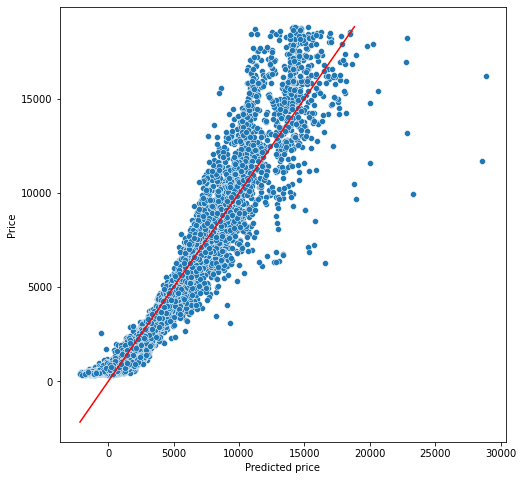

In [ ]:
plot_predictions(y_test, lr_predictions)

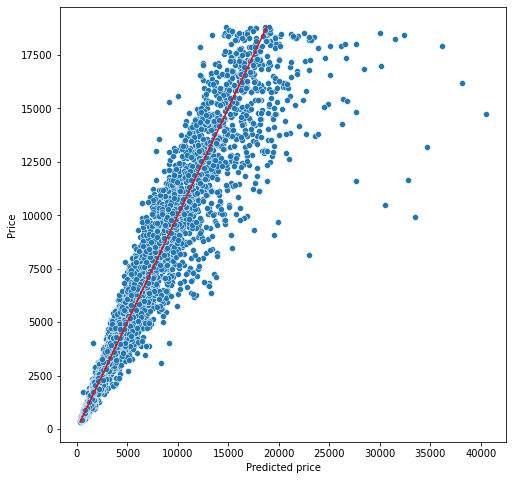

In [ ]:
plot_predictions(y_test, er_predictions)

In [ ]:
# comparing_models_df.plot.bar(subplots=True, figsize=(10, 20));

You should choose your metric before modelling your data. But we've shown all 4 side by side here to help give you a comprehension of their similarities and differences.

## Other ways of viewing our models

### Histogram of errors

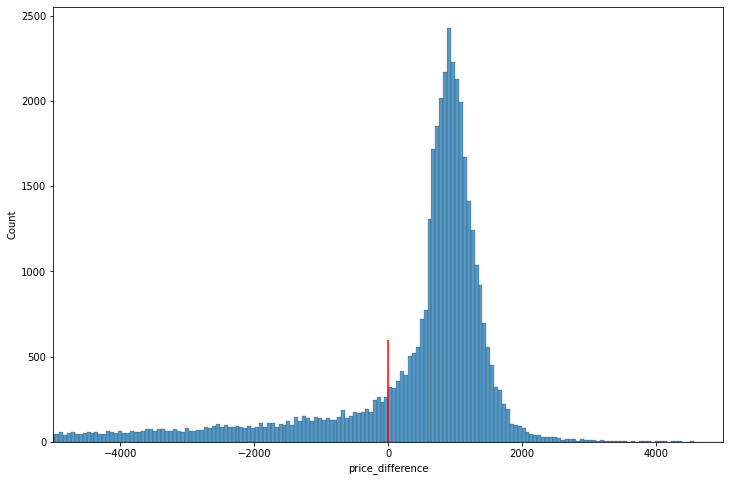

In [ ]:
plt.subplots(figsize=(12, 8))
sns.histplot(dumb_model_df["price_difference"])
plt.vlines(x=0, ymin=0, ymax=600, color='red')
plt.xlim(-5000, 5000)
plt.show()

Most of the predictions for our dumb model are positive (left skew). This tells us that in general our model tends to overpredict the price of the diamond.

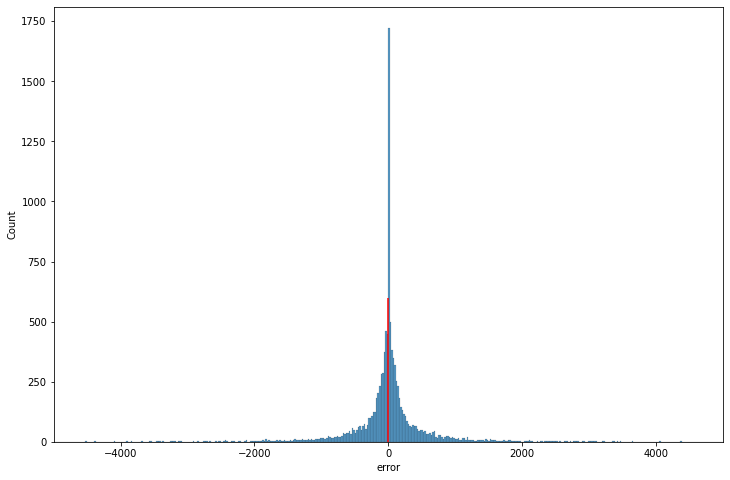

In [ ]:
dt_errors_df = X_test.copy()
dt_errors_df["price"] = y_test
dt_errors_df["prediction"] = dt_predictions
dt_errors_df["error"] = dt_errors_df["prediction"] - dt_errors_df["price"]

plt.subplots(figsize=(12, 8))
sns.histplot(dt_errors_df['error'])
plt.vlines(x=0, ymin=0, ymax=600, color='red')
plt.xlim(-5000, 5000)
plt.show()

We can see from our decision tree model that it is much more even handed in its over- and underestimation of the price

### Scatterplot of errors

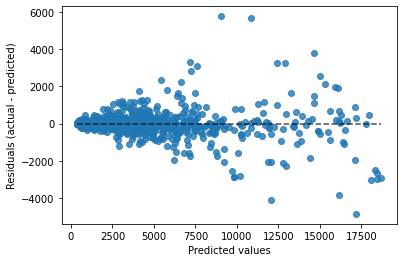

In [ ]:
from sklearn.metrics import PredictionErrorDisplay

PredictionErrorDisplay.from_predictions(y_test, dt_predictions)

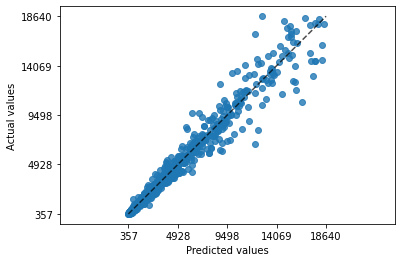

In [ ]:
PredictionErrorDisplay.from_predictions(y_test, dt_predictions, kind='actual_vs_predicted')

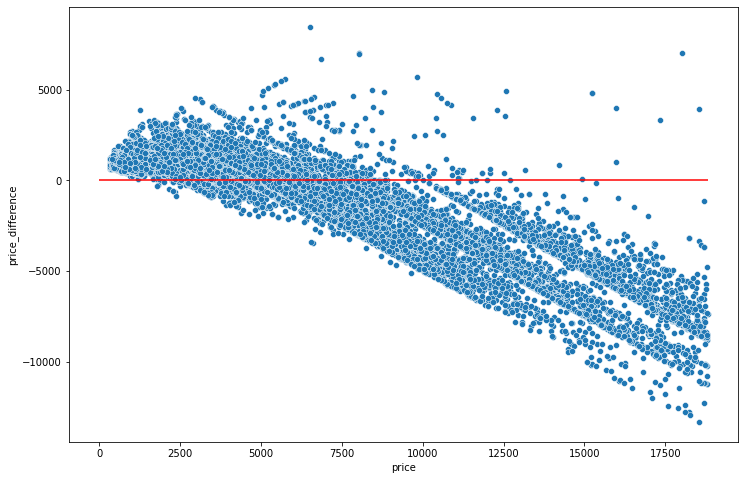

In [ ]:
plt.subplots(figsize=(12, 8))
sns.scatterplot(data=dumb_model_df, x='price', y='price_difference')
plt.hlines(y=0, xmin=0, xmax=max(dumb_model_df['price']), color='red')
plt.show()

We can see that the more expensive the diamonds become, the worse our model is at predicting the price

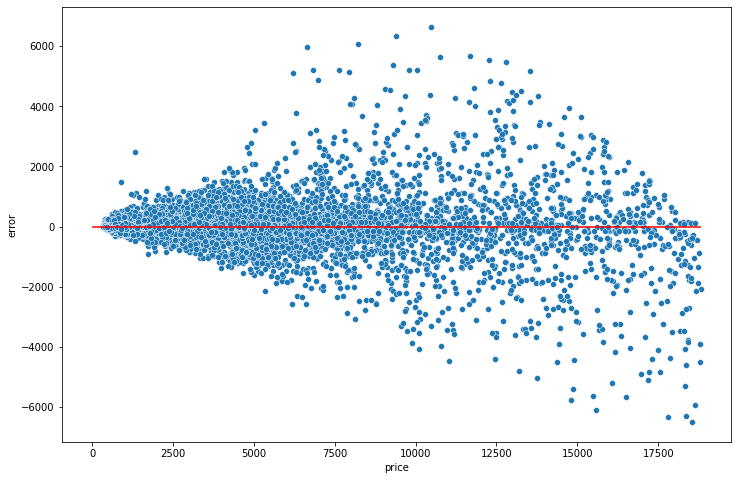

In [ ]:
plt.subplots(figsize=(12, 8))
sns.scatterplot(data=dt_errors_df, x='price', y='error')
plt.hlines(y=0, xmin=0, xmax=max(dt_errors_df['price']), color='red')
plt.show()

The decision tree definitely performs better with cheaper diamonds. But it looks like it is as equally poor at predicting mid price diamons as expensive ones.